In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_train=pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

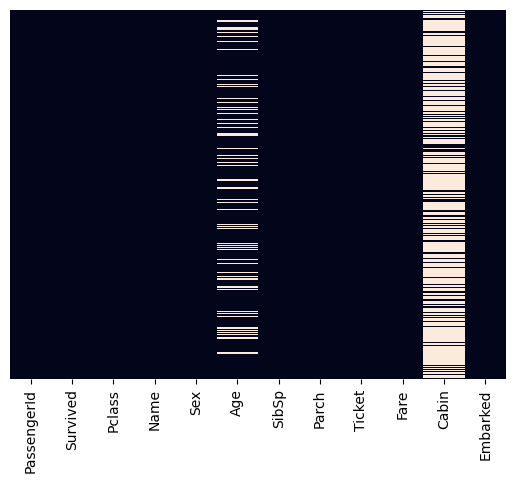

In [4]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False)

<Axes: xlabel='Pclass', ylabel='Age'>

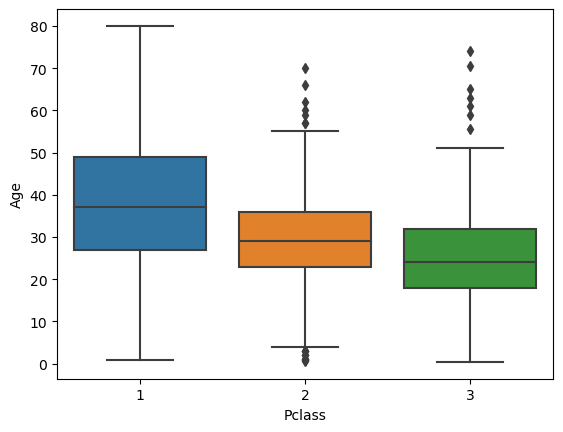

In [5]:
titanic_train=titanic_train.drop('Cabin',axis=1)
sns.boxplot(x='Pclass',y='Age',data=titanic_train)

In [6]:
avg_age_class=titanic_train.groupby('Pclass').mean()['Age']
print(round(avg_age_class))

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64


C:\Users\victo\AppData\Local\Temp\ipykernel_15720\348323161.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_age_class=titanic_train.groupby('Pclass').mean()['Age']


In [7]:
titanic_train.loc[titanic_train['Pclass']==1,'Age'] = titanic_train.loc[titanic_train['Pclass']==1,'Age'].fillna(value=round(avg_age_class.loc[1]))
titanic_train.loc[titanic_train['Pclass']==2,'Age'] = titanic_train.loc[titanic_train['Pclass']==2,'Age'].fillna(value=round(avg_age_class.loc[2]))
titanic_train.loc[titanic_train['Pclass']==3,'Age'] = titanic_train.loc[titanic_train['Pclass']==3,'Age'].fillna(value=round(avg_age_class.loc[3]))

In [8]:
titanic_train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
titanic_train.dropna(inplace=True)

In [10]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
sex_map = {'male': 1, 'female': 0}
titanic_train['Sex']=titanic_train['Sex'].map(sex_map)


In [13]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [14]:
embarked = pd.get_dummies(titanic_train['Embarked'],drop_first=True)
titanic_train = pd.concat([titanic_train,embarked],axis=1)
titanic_train.drop(['PassengerId','Embarked','Name','Ticket','Q'],axis=1,inplace=True)
titanic_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


<Axes: >

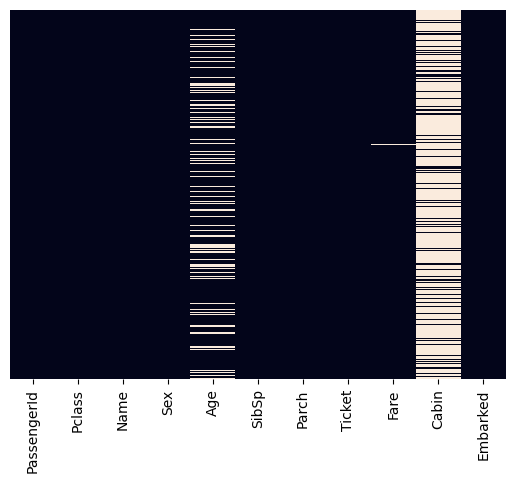

In [15]:
titanic_test=pd.read_csv('test.csv')
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False)

In [16]:
titanic_test=titanic_test.drop('Cabin',axis=1)
titanic_test.loc[titanic_test['Pclass']==1,'Age'] = titanic_test.loc[titanic_test['Pclass']==1,'Age'].fillna(value=round(avg_age_class.loc[1]))
titanic_test.loc[titanic_test['Pclass']==2,'Age'] = titanic_test.loc[titanic_test['Pclass']==2,'Age'].fillna(value=round(avg_age_class.loc[2]))
titanic_test.loc[titanic_test['Pclass']==3,'Age'] = titanic_test.loc[titanic_test['Pclass']==3,'Age'].fillna(value=round(avg_age_class.loc[3]))

In [17]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
titanic_test.dropna(inplace=True)

In [19]:
sex_map = {'male': 1, 'female': 0}
titanic_test['Sex']=titanic_test['Sex'].map(sex_map)
embarked = pd.get_dummies(titanic_test['Embarked'],drop_first=True)
titanic_test = pd.concat([titanic_test,embarked],axis=1)
passenger=titanic_test['PassengerId']
titanic_test.drop(['PassengerId','Embarked','Name','Ticket','Q'],axis=1,inplace=True)
titanic_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,S
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


# Score of the model according to train/test split

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [46]:
train=[]
test=[]
X = titanic_train.drop('Survived',axis=1)
y = titanic_train['Survived']
for i in np.arange(0.05, 0.55, 0.05):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=101)
    logmodelt = LogisticRegression(max_iter=1000)
    logmodelt.fit(X_train,y_train)
    train.append(logmodelt.score(X_train,y_train))
    test.append(logmodelt.score(X_test,y_test))

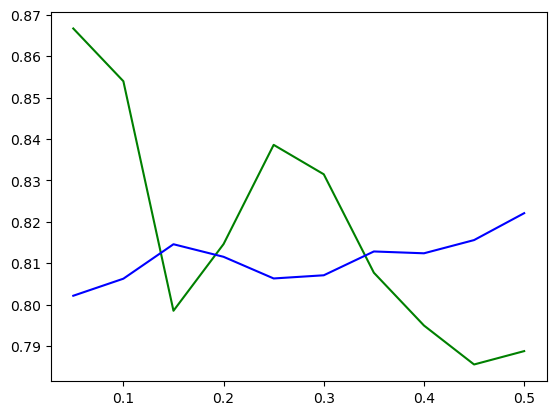

In [47]:
plt.plot(np.arange(0.05, 0.55, 0.05),test,color='green')
plt.plot(np.arange(0.05, 0.55, 0.05),train,color='blue')
plt.show()

# Score of the model according to max_iter

In [65]:
test=[]
train=[]
range1=range(140,1000,10)
for i in range1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
    logmodelm = LogisticRegression(max_iter=i)
    logmodelm.fit(X_train,y_train)
    train.append(logmodelm.score(X_train,y_train))
    test.append(logmodelm.score(X_test,y_test))

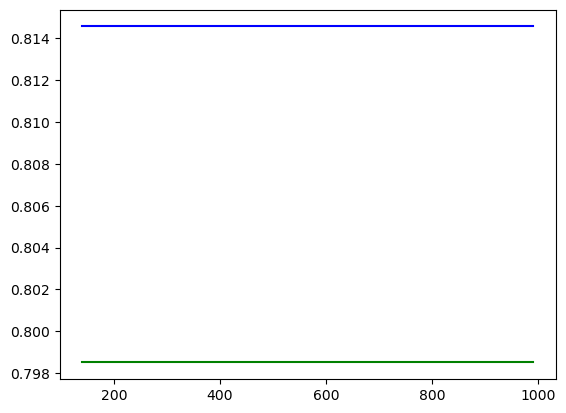

In [66]:
plt.plot(range1,test,color='green')
plt.plot(range1,train,color='blue')
plt.show()

# Training the model

In [50]:
X = titanic_train.drop('Survived',axis=1)
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
print(logmodel.score(X_train,y_train))
print(logmodel.score(X_test,y_test))

0.8145695364238411
0.7985074626865671


# Predict

In [51]:
predictions = logmodel.predict(titanic_test)
final_prediction = pd.DataFrame({'PassengerId':passenger,'Survived?':predictions})
final_prediction.head()



,PassengerId,Survived?
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [52]:
real=pd.read_csv('gender_submission.csv')
merged_df = pd.merge(real, final_prediction, on="PassengerId")
survived_comparison = merged_df["Survived"] == merged_df["Survived?"]
print(survived_comparison)

0       True
1      False
2       True
3       True
4       True
       ...  
412     True
413     True
414     True
415     True
416     True
Length: 417, dtype: bool


In [53]:
accuracy = survived_comparison.mean() * 100
print(accuracy)

94.48441247002398


# Saving the model

In [54]:
import joblib
joblib.dump(logmodel, 'titanic_logistic_regression.pkl')

['titanic_logistic_regression.pkl']